# Mastering MLOps: Hands-on Exercise 4
## Shared MLFlow

Fourth hands-on exercise, registering Churn Classification experiments on MLFlow, but this time using a shared environment in DagsHub.

Here, I will detail the necessary steps to achieve the task:

In [10]:
import mlflow
import os
import pandas as pd
from pycaret.classification import *

### 1. Set MLFlow environment variables

Set environment variables as it is shown in DagsHub (DagsHub Repo -> Remote -> Experiments -> Using MLFlow tracking).

In [4]:
os.environ["MLFLOW_TRACKING_USERNAME"] = "dgcanalesr"
os.environ["MLFLOW_TRACKING_PASSWORD"] = "c10a5c1725711f3bfcba3c57db9a1dc19cdb3923" #Use DagsHub token
os.environ["MLFLOW_TRACKING_URI"] = "https://dagshub.com/dgcanalesr/churn-classification.mlflow"
os.environ["PYCARET_CUSTOM_LOGGING_LEVEL"] = "CRITICAL"

### 2. Set MLFlow tracking URI

In [5]:
mlflow.set_tracking_uri("https://dagshub.com/dgcanalesr/churn-classification.mlflow")

### 3. Load data

In [9]:
df = pd.read_csv("data/customer_churn_data_preprocessed.csv", index_col=0)
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,TotalCharges,Churn
0,Female,0,Yes,No,1,No,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,No
1,Male,0,No,No,34,Yes,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,1889.50,No
2,Male,0,No,No,2,Yes,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,108.15,Yes
3,Male,0,No,No,45,No,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),1840.75,No
4,Female,0,No,No,2,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,151.65,Yes


### 4. Experiments

In [11]:
churn_clf = setup(data = df, 
                  target = 'Churn',           
                  log_experiment = True, 
                  experiment_name = 'churn-classifier')

,Description,Value
0,Session id,461
1,Target,Churn
2,Target type,Binary
3,Target mapping,"No: 0, Yes: 1"
4,Original data shape,"(7043, 18)"
5,Transformed data shape,"(7043, 37)"
6,Transformed train set shape,"(4930, 37)"
7,Transformed test set shape,"(2113, 37)"
8,Ordinal features,5
9,Numeric features,3


2023/09/12 21:37:12 INFO mlflow.tracking.fluent: Experiment with name 'churn-classifier' does not exist. Creating a new experiment.


In [12]:
best_model = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
ridge,Ridge Classifier,0.8039,0.0000,0.5229,0.6682,0.5853,0.4596,0.4663,0.2030
lr,Logistic Regression,0.8037,0.8435,0.5436,0.6599,0.5946,0.4669,0.4716,0.5690
gbc,Gradient Boosting Classifier,0.8028,0.8445,0.5321,0.6609,0.5885,0.4610,0.4663,0.4150
ada,Ada Boost Classifier,0.8008,0.8451,0.5191,0.6593,0.5798,0.4519,0.4581,0.3050
lda,Linear Discriminant Analysis,0.8000,0.8364,0.5604,0.6431,0.5975,0.4655,0.4683,0.1640
lightgbm,Light Gradient Boosting Machine,0.7935,0.8311,0.5275,0.6344,0.5749,0.4403,0.4443,1.7760
rf,Random Forest Classifier,0.7850,0.8161,0.4923,0.6191,0.5478,0.4094,0.4144,0.4500
et,Extra Trees Classifier,0.7710,0.7893,0.4779,0.5833,0.5247,0.3760,0.3796,0.4760
knn,K Neighbors Classifier,0.7509,0.7384,0.4273,0.5400,0.4763,0.3160,0.3201,0.1760
svm,SVM - Linear Kernel,0.7436,0.0000,0.2791,0.5834,0.3332,0.2133,0.2493,0.1720


In [13]:
best_model

RidgeClassifier(alpha=1.0, class_weight=None, copy_X=True, fit_intercept=True,
                max_iter=None, positive=False, random_state=461, solver='auto',
                tol=0.0001)

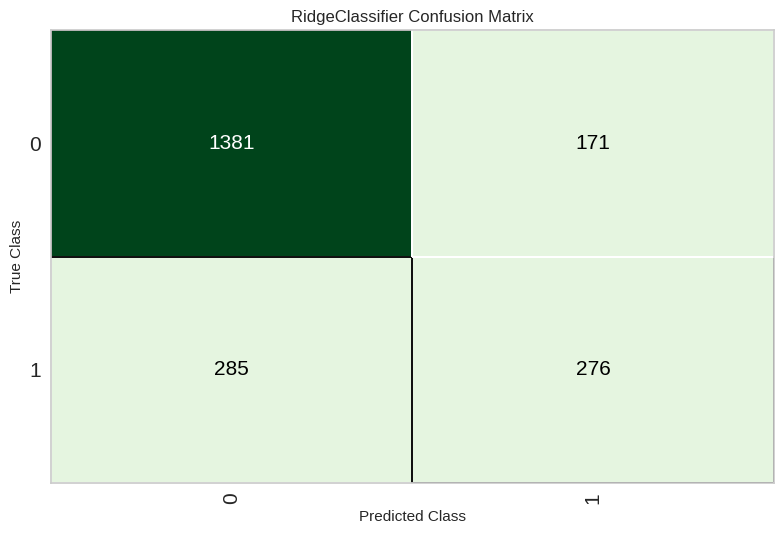

In [16]:
plot_model(best_model, plot="confusion_matrix")

In [17]:
save_model(best_model, 'outputs\model')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=FastMemory(location=/tmp/joblib),
          steps=[('label_encoding',
                  TransformerWrapperWithInverse(exclude=None, include=None,
                                                transformer=LabelEncoder())),
                 ('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['SeniorCitizen', 'tenure',
                                              'TotalCharges'],
                                     transformer=SimpleImputer(add_indicator=False,
                                                               copy=True,
                                                               fill_value=None,
                                                               keep_empty_featu...
                                                                     'StreamingTV',
                                                                     'StreamingMovies',
                                        